<a href="https://colab.research.google.com/github/cfreeman22/TravelPackagePrediction/blob/main/TravelPackagePurchasePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Travel Package Purchase Prediction
# Which customer is most likely to book a package deal travel tour?
Presented By Christian Freeman 
FEB 18, 2022  


## Description
### Background and Context

**Visit with us** is a tourism company that wants to understand its existing business model and establish a viable business model to expand the customer base by introducing new package deals.

 Currently, there are five types of packages the company offers - Basic, Standard, Deluxe, Super Deluxe, King. Looking at the last year's data, we observed that 18% of the customers purchased the packages. However, the marketing cost was relatively high because customers were contacted randomly.

The company is now planning to launch a new product, i.e., Wellness Tourism Package. Wellness Tourism is defined as Travel that allows the traveler to maintain, enhance or kick-start a healthy lifestyle and support or increase one's sense of well-being.

However, this time company wants to harness the available data of existing and potential customers to make the marketing expenditure more efficient.

As a Data Scientist at **"Visit with us"** travel company, I have to analyze the customers' data and information to provide recommendations to the Policy Maker and Marketing Team and build a model to predict the potential customer who is going to purchase the newly introduced travel 

Project Planning
## PLAN ==> Acquire ==> Prepare ==> Explore ==> Model &Evaluate ==> Deliver

Understanding consumer behavior can quite chanlenging, especially when the product we offer our customers is a service and a leisure in this case. To derive meaningful insights, I will perform the following:


- Prepare the data for visualization using a customized  module wrangle.py
- Visualize the data
- Identify patterns and insights 
- Document key observations and relationships between variables 
- Build machine models 

 
## Goals and summary
My goal in this project is to:

- Identify the characteristics of customers who are more likely to purchase a new travel package deal, and the potential reasons for this behavior.
- Build a ML model To predict which customer is more likely to purchase the newly introduced travel package.
- Build Bagging classifier, Random Forest, and Decision Tree
- Build Adaboost, GradientBoost, XGBoost, and Stacking classifiers
- Make recommendations are made based on the findings to help increase the chances of creating a customer base for the new product .
 
## Initial Questions
* What are unique characteristics of our customers?
* What factors increase their chances of purchasing a travel plan ?
* can we predict the behavior of these customers ?
 
 
## Findings Include:
- 
-

In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
import wrangle
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
#To install xgboost library use - !pip install xgboost 
from xgboost import XGBClassifier

# Acquire Data
-  Loading the data provided in the course

In [2]:
tourism =pd.read_csv("Tourism.csv")

In [3]:
 
df = tourism.copy() # let us make another copy of data

In [4]:
# Checking the head
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

In [6]:
# Checking for duplicates
df[df.duplicated()].count()

CustomerID                  0
ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

In [7]:
# Checking for nulls
df.isna().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

In [8]:
# Descriptives Statistics
df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
CustomerID,4888.0,NaN,NaN,NaN,202443.5,1411.188388,200000.0,201221.75,202443.5,203665.25,204887.0
ProdTaken,4888.0,NaN,NaN,NaN,0.188216,0.390925,0.0,0.0,0.0,0.0,1.0
Age,4662.0,NaN,NaN,NaN,37.622265,9.316387,18.0,31.0,36.0,44.0,61.0
TypeofContact,4863,2,Self Enquiry,3444,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CityTier,4888.0,NaN,NaN,NaN,1.654255,0.916583,1.0,1.0,1.0,3.0,3.0
DurationOfPitch,4637.0,NaN,NaN,NaN,15.490835,8.519643,5.0,9.0,13.0,20.0,127.0
Occupation,4888,4,Salaried,2368,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,4888,3,Male,2916,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NumberOfPersonVisiting,4888.0,NaN,NaN,NaN,2.905074,0.724891,1.0,2.0,3.0,3.0,5.0
NumberOfFollowups,4843.0,NaN,NaN,NaN,3.708445,1.002509,1.0,3.0,4.0,4.0,6.0


In [9]:
# Value counts of all variables
for column in df.columns.to_list():
    print(df[column].value_counts())
    print('===================================')
    print()

200000    1
203256    1
203263    1
203262    1
203261    1
         ..
201628    1
201627    1
201626    1
201625    1
204887    1
Name: CustomerID, Length: 4888, dtype: int64

0    3968
1     920
Name: ProdTaken, dtype: int64

35.0    237
36.0    231
34.0    211
31.0    203
30.0    199
32.0    197
33.0    189
37.0    185
29.0    178
38.0    176
41.0    155
39.0    150
28.0    147
40.0    146
42.0    142
27.0    138
43.0    130
46.0    121
45.0    116
26.0    106
44.0    105
51.0     90
47.0     88
50.0     86
25.0     74
52.0     68
53.0     66
48.0     65
49.0     65
55.0     64
54.0     61
56.0     58
24.0     56
22.0     46
23.0     46
59.0     44
21.0     41
20.0     38
19.0     32
58.0     31
57.0     29
60.0     29
18.0     14
61.0      9
Name: Age, dtype: int64

Self Enquiry       3444
Company Invited    1419
Name: TypeofContact, dtype: int64

1    3190
3    1500
2     198
Name: CityTier, dtype: int64

9.0      483
7.0      342
8.0      333
6.0      307
16.0     274
15.0     2

### Obsevations
- The dataframe contains 4888 rows and 20 columns
- There are no duplicated values
- Age, type of contract, DurationOfPitch, NumberOfFollowups, PreferredPropertyStar, NumberOfTrips, NumberOfChildrenVisiting, and MonthlyIncome columns have missing values
- Duration of picht last from 5 to 127 minutes
_ Age range from 18 to 61. Maybe put it bins?
- Categorical variables are : ProdTaken, Designation, OwnCar, Passport, MaritalStatus, TypeofContact, CityTier, PitchSatisfactionScore, Occupation, Gender, PreferredPropertyStar, , NumberOfPersonVisiting, NumberOfChildrenVisiting
- Numeric variables : MonthlyIncome, Age, NumberOfTrips, DurationOfPitch
- Monthly income range from 1000 to 98678 . Maybe put it bins?
- There are two categories for Female in the gender column we probabily have a typo for Female and Fe Male
- We could also merge Single Unmarried into one unique variable
- For Occupation, there are only two obsevation for free lancer (drop or merge with other group?)
- number of persons visiting 1 and 5 do not have many values. could we merge with the popular group?

### Action plan
- Missing values treatment
- Create bins for age , monthly income, and duration of pitch
- Restructuring some variables, and data types
- The descriptive stats shows that most columns are slightly skewed to right right. So i will used the median to impute missing values
- For the type of contract, we have 25 nans. here i will impute with the majority which is self inquiry
- Performing Univariate, bivariate and multivariate data Analysis as well as statistical tests
- Applying Category type to categorical Variables

# Prepare Data

In [10]:
## Lets start off by filling the missig values in these columns by the median

fillnan_median = lambda x: x.fillna(x.median())
nan_cols = ['DurationOfPitch','MonthlyIncome','Age','NumberOfTrips', 'NumberOfFollowups','PreferredPropertyStar']

In [11]:
df[nan_cols] = df[nan_cols].apply(fillnan_median) #This line of code treats missing values with median

In [12]:
# checking to see if theses columns have been affected
df.isna().sum()

CustomerID                   0
ProdTaken                    0
Age                          0
TypeofContact               25
CityTier                     0
DurationOfPitch              0
Occupation                   0
Gender                       0
NumberOfPersonVisiting       0
NumberOfFollowups            0
ProductPitched               0
PreferredPropertyStar        0
MaritalStatus                0
NumberOfTrips                0
Passport                     0
PitchSatisfactionScore       0
OwnCar                       0
NumberOfChildrenVisiting    66
Designation                  0
MonthlyIncome                0
dtype: int64

- The type of contract has 25 NaN. we will treat this column uising the mode because there are only two possible values Self Enquiry or company invited
- The nan for number of children could be replace by 0. We can safely assume that no value inputed because there were no kids.

In [13]:
df['TypeofContact'].mode()

0    Self Enquiry
dtype: object

In [14]:
# Replacing the NaN for TypeofContact with Self Enquiry
df['TypeofContact']=df['TypeofContact'].fillna('Self Enquiry')

In [15]:
# Replacing the NaN for NumberOfChildrenVisited with 0
df['NumberOfChildrenVisiting']=df['NumberOfChildrenVisiting'].fillna(0)

In [16]:
# checking to see if theses columns have been affected
df.isna().sum()

CustomerID                  0
ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

-  Lets fix the Fe Male typo  in the gender column and convert it to Female
- We will also merge Single and Unmarried into one unique variable Single

In [17]:
# fxing the Fe Male typo
df['Gender'].mask(df['Gender'] == 'Fe Male','Female', inplace=True)

In [18]:
# Fixing the Unmarried and Single 
df['MaritalStatus'].mask(df['MaritalStatus'] == 'Unmarried','Single', inplace=True)

In [19]:
# Checking to see if they are fixed
print(df.Gender.value_counts())
print(df.MaritalStatus.value_counts())

Male      2916
Female    1972
Name: Gender, dtype: int64
Married     2340
Single      1598
Divorced     950
Name: MaritalStatus, dtype: int64


# Explore Data
- Creating variables for categorical and numerical to help with exploring


In [20]:
cat_var = ['ProdTaken', 'Designation', 'OwnCar', 'Passport', 'MaritalStatus', 'TypeofContact', 'CityTier',
           'PitchSatisfactionScore', 'Occupation', 'Gender', 'PreferredPropertyStar',  'NumberOfPersonVisiting',
           'NumberOfChildrenVisiting','NumberOfFollowups','ProductPitched']
cat_var2 = ['Designation', 'OwnCar', 'Passport', 'MaritalStatus', 'TypeofContact', 'CityTier',
           'PitchSatisfactionScore', 'Occupation', 'Gender', 'PreferredPropertyStar',  'NumberOfPersonVisiting',
           'NumberOfChildrenVisiting','NumberOfFollowups','ProductPitched']
target = 'ProdTaken'
quant_var = ['MonthlyIncome', 'Age', 'NumberOfTrips','DurationOfPitch']

In [21]:
df[cat_var2] =df[cat_var2].astype('category') # applying categorical types to categorical variables

In [22]:
df.info() # Checking if the categories were changed appropriately

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   CustomerID                4888 non-null   int64   
 1   ProdTaken                 4888 non-null   int64   
 2   Age                       4888 non-null   float64 
 3   TypeofContact             4888 non-null   category
 4   CityTier                  4888 non-null   category
 5   DurationOfPitch           4888 non-null   float64 
 6   Occupation                4888 non-null   category
 7   Gender                    4888 non-null   category
 8   NumberOfPersonVisiting    4888 non-null   category
 9   NumberOfFollowups         4888 non-null   category
 10  ProductPitched            4888 non-null   category
 11  PreferredPropertyStar     4888 non-null   category
 12  MaritalStatus             4888 non-null   category
 13  NumberOfTrips             4888 non-null   float6

## Univariate Analysis Numeric Columns

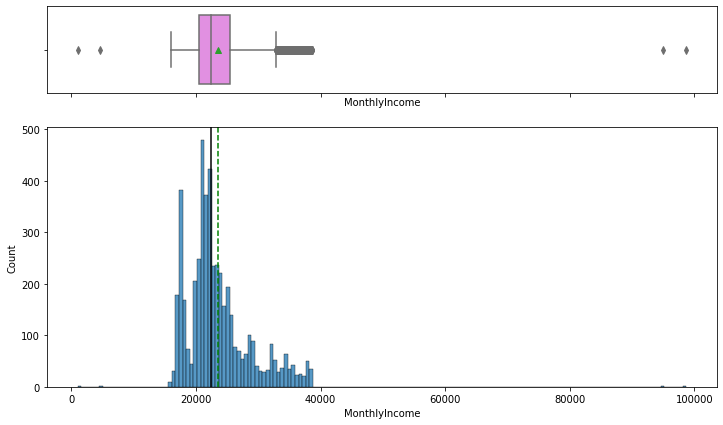

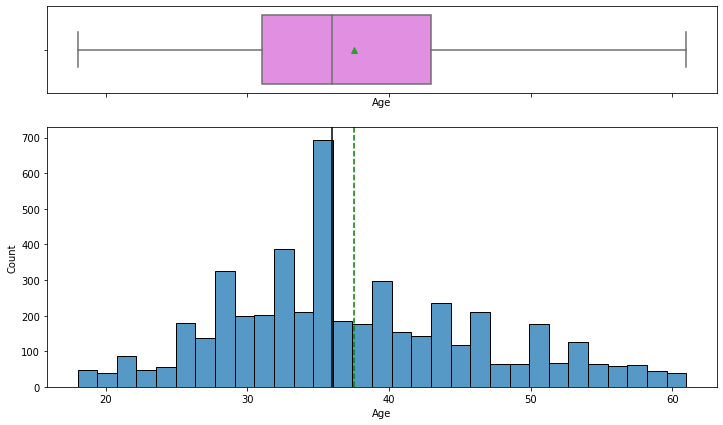

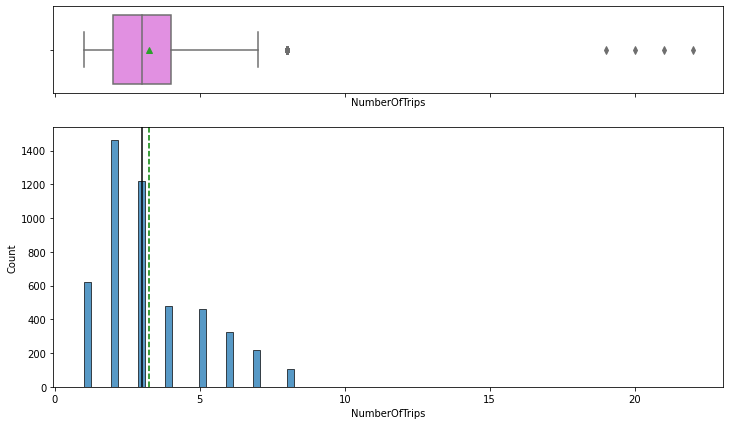

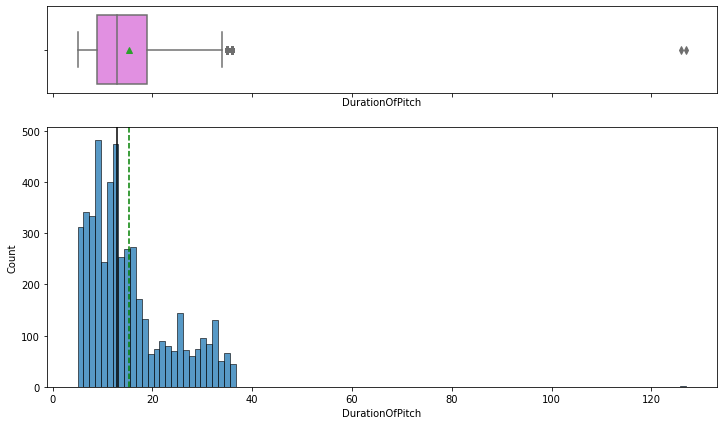

In [23]:
for x in quant_var:
    wrangle.histogram_boxplot(df, x) #Analysing numeric variables using our predefined module stored in the wrangle file

### Takeaway For univariate numeric columns
- The monthly income is slightly skewed to the right, with some outliers. It has a mean of 23559 and a median of 22347.
- The mean age is 37 and somewhat normally distributed.
- The number of trips is slightly skewed to the right and has some outliers.
- The duration of the pitch is skewed to the right, with some outliers


## Univariate Analysis categorical Columns

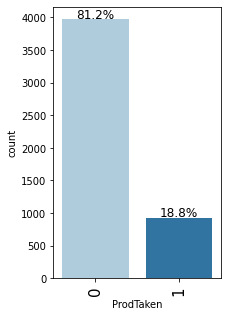

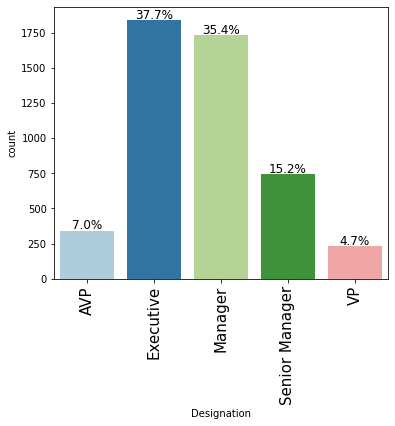

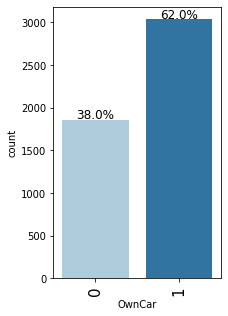

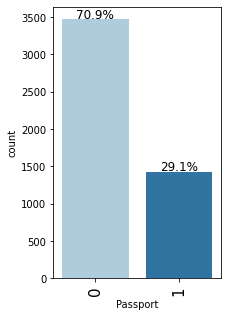

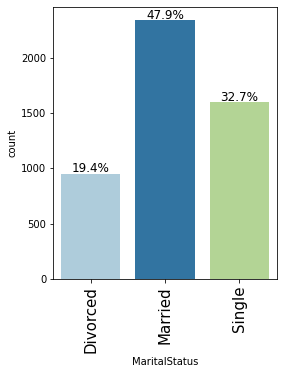

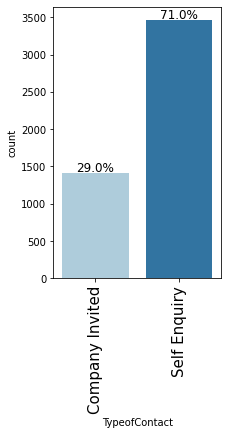

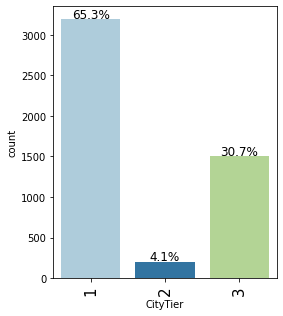

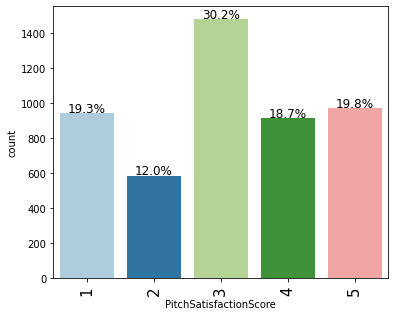

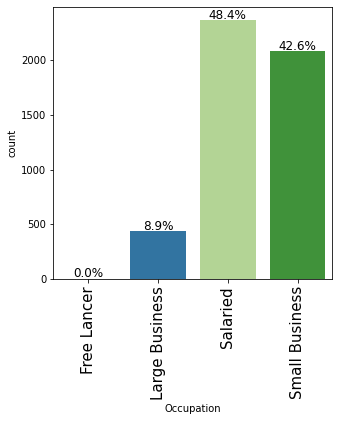

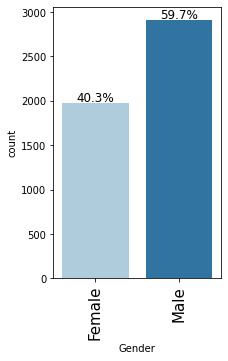

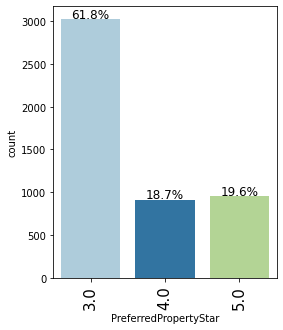

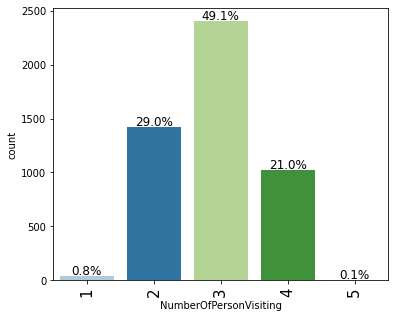

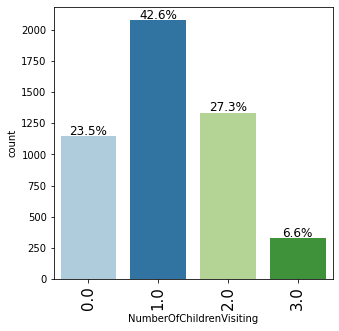

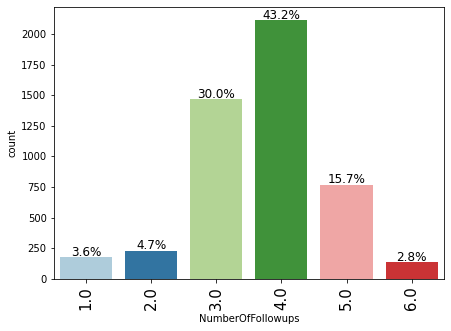

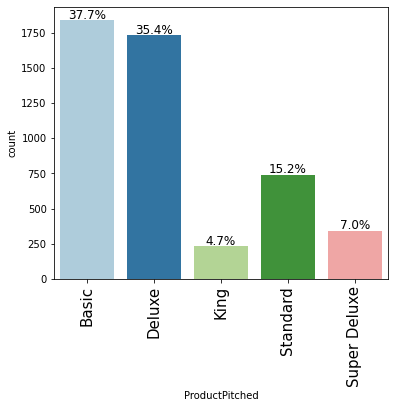

In [24]:
for x in cat_var:
    wrangle.labeled_barplot(df, x, perc=True) #Analysing categorical variables using our predefined module stored in the wrangle file

### Takeaway For univariate categorical columns
- 
- 18.8%  of people have taken the product, and 81.2% have not.
- Executives and managers represent 37.7% and 35.4% of the entire data, respectively. They are followed by Senior managers with 15.2%, AVP 7%, and VP 4.7%.
- 62% of the population have cars, and 38% do not.
- 70.9% do not have a passport, 29.1% do.
- 47.9% are married, 32.7% are single, and 19.4% are divorced.
- For the type of contract, 71% is self-inquiry while 29% is company invited.
- For the city tier, 65.3% is tier 1, 30.7% is tier 3, and 4.1% in tier 2.
- For the pitch satisfaction score, 19.3% is rated by1, 12% rated 2, 30.2% rated 3, 18.7% rated 4, and  19.8% rated 5.
- For occupation, Salaried and small businesses represent 48.2% and  42.6%, respectively. Then, large businesses and Freelancers 8.9%.
- For gender, males represent 59.7% and females 41.3%.
- For preferred property, 3 stars represent 61.8%, 4 stars 18.7%, and 5 stars 19.6%.
- For the number of people visiting, 3-persons has the highest percentage with 49.1%, followed by 2-persons 29%,  4-persons 8%, and 5-persons 1%.
- For the number of accompanying children, 1 has 42.6%, 2 has 27.3%, 0 represent 23.5%, while 3 represents 6.6%.
- For the number of follow-ups, 4 and  3 represent 42.2% and  30%, respectively. Then, 5,  2, 6, 1 represent 15.7%, 4.7%, 3.6%, and 2.8%,respectively.
- Basic and deluxe represent 37.7% and  35.4% for the product pitched, respectively. Then, standard, super deluxe, and king represent 15.2%, 7%, and 4.7%, respectively.

## Bivariate Analysis

### Statistical Hypothesis

Although I performed statistical tests on many variables as it relates to the product taken, i will mention the hypothesis of of 5 question and will give a brief explanation of other tests. 

- Question 1) H0 = The Average of the customer signing up for a trip is the same in each designation group.
- Question 1) H1 = The Average of the customer signing up for a trip is different in each group.
_____________________________________________________________________________
- Question 2) H0 = The Average of customers signing up for a trip is the same in those who have a passport and those who do not.
- Question 2) H1 = The Average of customers signing up for a trip is NOT the same in those who have a passport and those who do not.
_____________________________________________________________________________
- Question 3) H0 = The Average of customers signing up for a trip is the same in all marital status groups.
- Question 3) H1 = The Average of customers signing up for a trip is different in each subgroup.
_______________________________________________________________________________
- Question 4) H0 = The Average of customers signing up for a trip is the same for each type of contract.
- Question 4) H1 = The Average of customers signing up for a trip is different in each contract subgroup.
_______________________________________________________________________________
- Question 5) H0 = The Average of customers signing up for a trip is the same for each occupation group.
- Question 5) H1 = The Average of customers signing up for a trip is different in each occupation group.

Designation 
_____________________

         chi2       p-value  degrees of freedom
0  261.273951  2.423597e-55                   4

observed:
 ProdTaken          0    1   All
Designation                    
AVP              322   20   342
Executive       1290  552  1842
Manager         1528  204  1732
Senior Manager   618  124   742
VP               210   20   230
All             3968  920  4888

expected:
              0           1
0   277.630115   64.369885
1  1495.306056  346.693944
2  1406.009820  325.990180
3   602.343699  139.656301
4   186.710311   43.289689


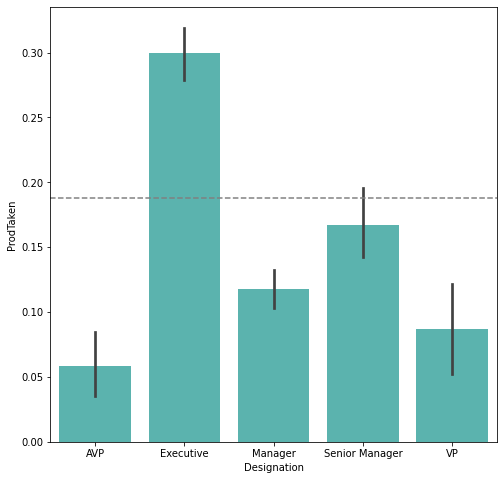


_____________________

OwnCar 
_____________________

       chi2   p-value  degrees of freedom
0  0.588108  0.443152                   1

observed:
 ProdTaken     0    1   All
OwnCar                    
0          1496  360  1856
1          2472  560  3032
All        3968  920  4888

expected:
              0           1
0  1506.671031  349.328969
1  2461.328969  570.671031


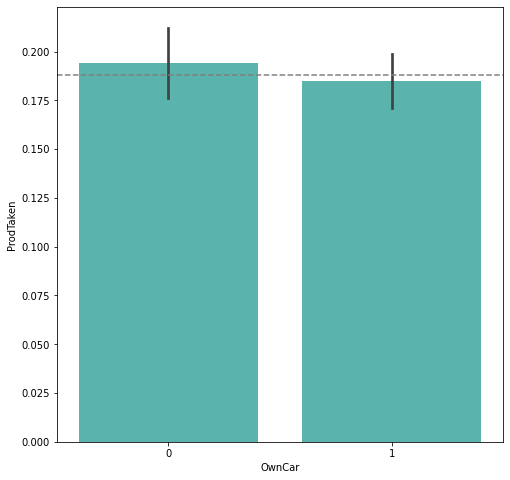


_____________________

Passport 
_____________________

         chi2       p-value  degrees of freedom
0  331.109969  5.508530e-74                   1

observed:
 ProdTaken     0    1   All
Passport                  
0          3040  426  3466
1           928  494  1422
All        3968  920  4888

expected:
              0           1
0  2813.643208  652.356792
1  1154.356792  267.643208


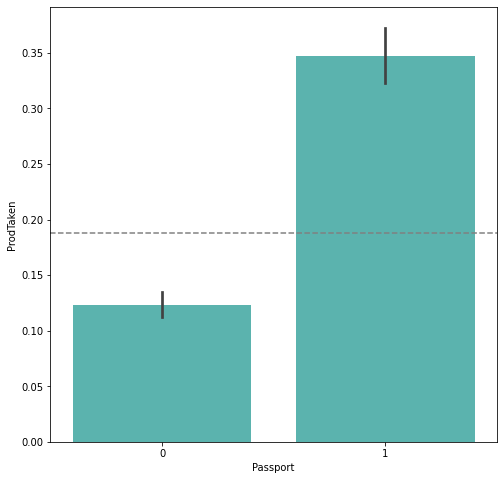


_____________________

MaritalStatus 
_____________________

         chi2       p-value  degrees of freedom
0  174.610656  1.212768e-38                   2

observed:
 ProdTaken         0    1   All
MaritalStatus                 
Divorced        826  124   950
Married        2014  326  2340
Single         1128  470  1598
All            3968  920  4888

expected:
              0           1
0   771.194763  178.805237
1  1899.574468  440.425532
2  1297.230769  300.769231


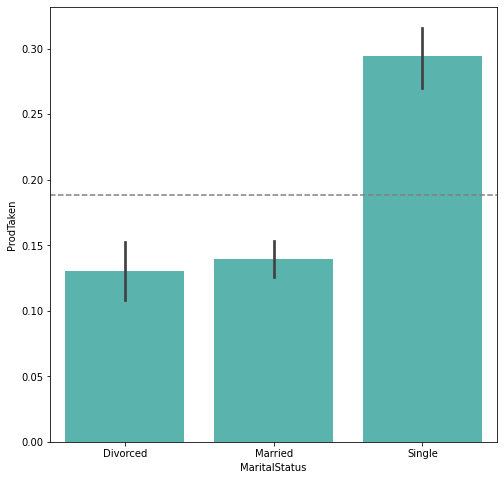


_____________________

TypeofContact 
_____________________

        chi2   p-value  degrees of freedom
0  11.695485  0.000627                   1

observed:
 ProdTaken           0    1   All
TypeofContact                   
Company Invited  1109  310  1419
Self Enquiry     2859  610  3469
All              3968  920  4888

expected:
             0          1
0  1151.92144  267.07856
1  2816.07856  652.92144


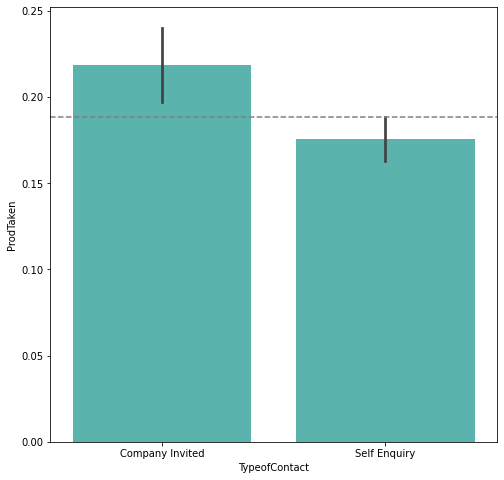


_____________________

CityTier 
_____________________

       chi2       p-value  degrees of freedom
0  38.20259  5.063059e-09                   2

observed:
 ProdTaken     0    1   All
CityTier                  
1          2670  520  3190
2           152   46   198
3          1146  354  1500
All        3968  920  4888

expected:
              0           1
0  2589.590835  600.409165
1   160.733224   37.266776
2  1217.675941  282.324059


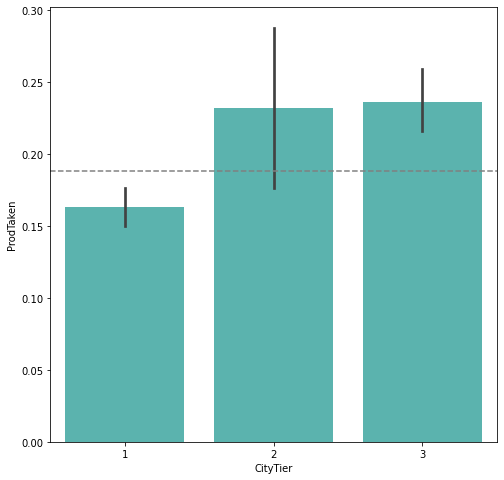


_____________________

PitchSatisfactionScore 
_____________________

        chi2   p-value  degrees of freedom
0  25.334011  0.000043                   4

observed:
 ProdTaken                  0    1   All
PitchSatisfactionScore                 
1                        798  144   942
2                        498   88   586
3                       1162  316  1478
4                        750  162   912
5                        760  210   970
All                     3968  920  4888

expected:
              0           1
0   764.700491  177.299509
1   475.705401  110.294599
2  1199.816694  278.183306
3   740.346972  171.653028
4   787.430442  182.569558


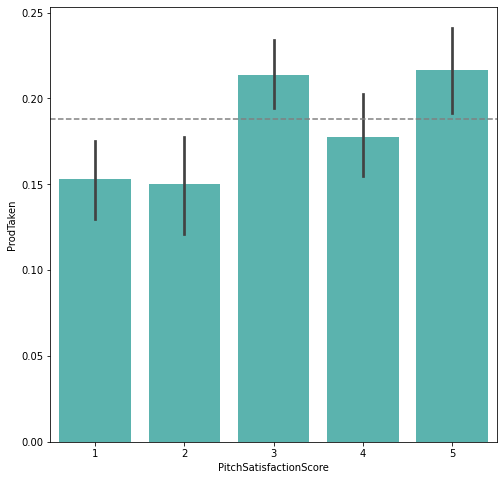


_____________________

Occupation 
_____________________

        chi2       p-value  degrees of freedom
0  33.753827  2.233003e-07                   3

observed:
 ProdTaken          0    1   All
Occupation                     
Free Lancer        0    2     2
Large Business   314  120   434
Salaried        1954  414  2368
Small Business  1700  384  2084
All             3968  920  4888

expected:
              0           1
0     1.623568    0.376432
1   352.314239   81.685761
2  1922.304419  445.695581
3  1691.757774  392.242226


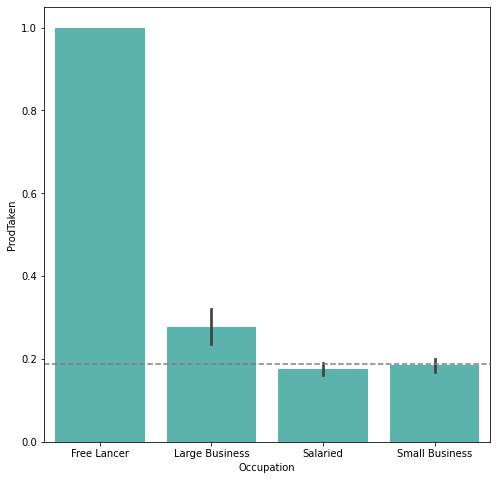


_____________________

Gender 
_____________________

       chi2   p-value  degrees of freedom
0  4.570393  0.032529                   1

observed:
 ProdTaken     0    1   All
Gender                    
Female     1630  342  1972
Male       2338  578  2916
All        3968  920  4888

expected:
              0           1
0  1600.837971  371.162029
1  2367.162029  548.837971


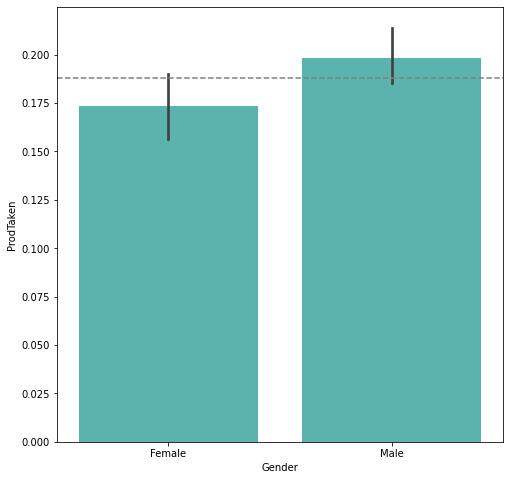


_____________________

PreferredPropertyStar 
_____________________

        chi2       p-value  degrees of freedom
0  48.301062  3.247563e-11                   2

observed:
 ProdTaken                 0    1   All
PreferredPropertyStar                 
3.0                    2531  488  3019
4.0                     731  182   913
5.0                     706  250   956
All                    3968  920  4888

expected:
              0           1
0  2450.775777  568.224223
1   741.158756  171.841244
2   776.065466  179.934534


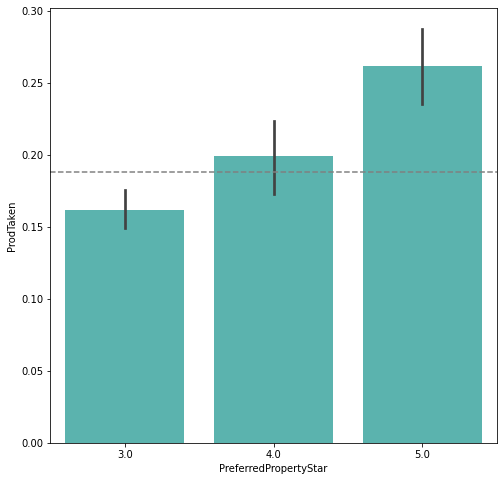


_____________________

NumberOfPersonVisiting 
_____________________

       chi2   p-value  degrees of freedom
0  9.908307  0.042001                   4

observed:
 ProdTaken                  0    1   All
NumberOfPersonVisiting                 
1                         39    0    39
2                       1151  267  1418
3                       1942  460  2402
4                        833  193  1026
5                          3    0     3
All                     3968  920  4888

expected:
              0           1
0    31.659574    7.340426
1  1151.109656  266.890344
2  1949.905074  452.094926
3   832.890344  193.109656
4     2.435352    0.564648


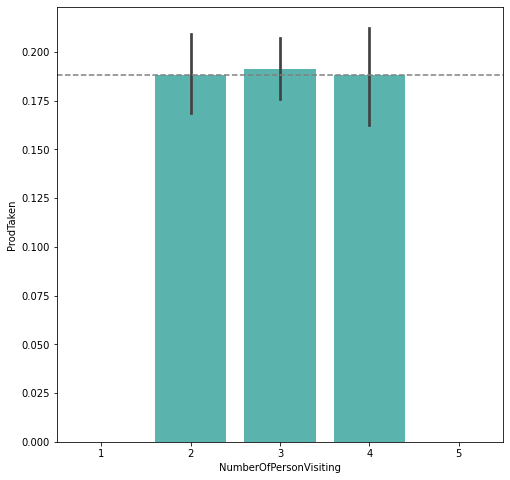


_____________________

NumberOfChildrenVisiting 
_____________________

       chi2  p-value  degrees of freedom
0  0.770412  0.85653                   3

observed:
 ProdTaken                    0    1   All
NumberOfChildrenVisiting                 
0.0                        939  209  1148
1.0                       1688  392  2080
2.0                       1082  253  1335
3.0                        259   66   325
All                       3968  920  4888

expected:
              0           1
0   931.927987  216.072013
1  1688.510638  391.489362
2  1083.731588  251.268412
3   263.829787   61.170213


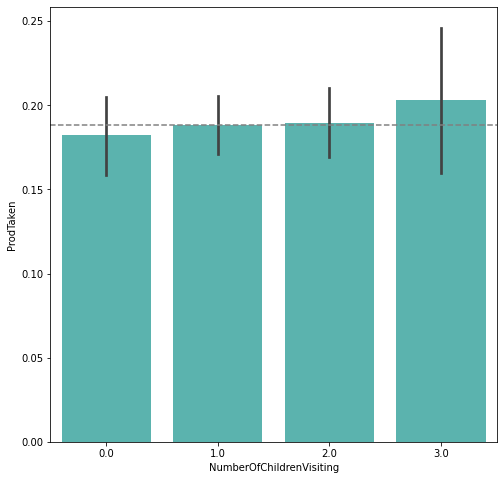


_____________________

NumberOfFollowups 
_____________________

        chi2       p-value  degrees of freedom
0  78.949225  1.391971e-15                   5

observed:
 ProdTaken             0    1   All
NumberOfFollowups                 
1.0                 156   20   176
2.0                 205   24   229
3.0                1222  244  1466
4.0                1726  387  2113
5.0                 577  191   768
6.0                  82   54   136
All                3968  920  4888

expected:
              0           1
0   142.873977   33.126023
1   185.898527   43.101473
2  1190.075286  275.924714
3  1715.299509  397.700491
4   623.450082  144.549918
5   110.402619   25.597381


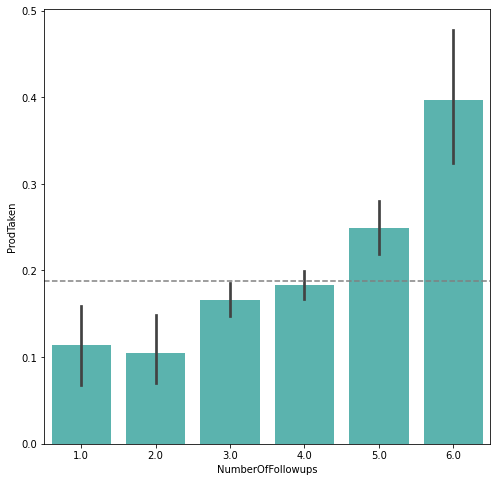


_____________________

ProductPitched 
_____________________

         chi2       p-value  degrees of freedom
0  261.273951  2.423597e-55                   4

observed:
 ProdTaken          0    1   All
ProductPitched                 
Basic           1290  552  1842
Deluxe          1528  204  1732
King             210   20   230
Standard         618  124   742
Super Deluxe     322   20   342
All             3968  920  4888

expected:
              0           1
0  1495.306056  346.693944
1  1406.009820  325.990180
2   186.710311   43.289689
3   602.343699  139.656301
4   277.630115   64.369885


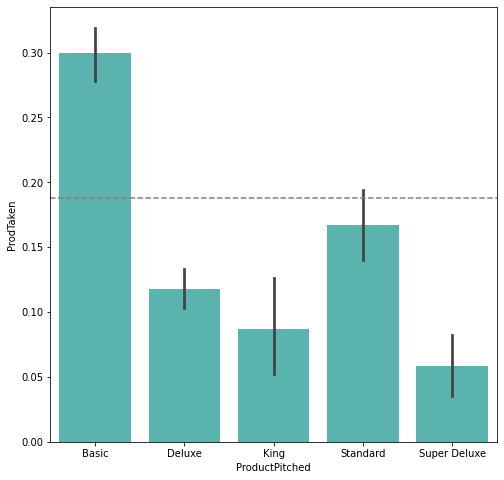


_____________________

MonthlyIncome 
____________________



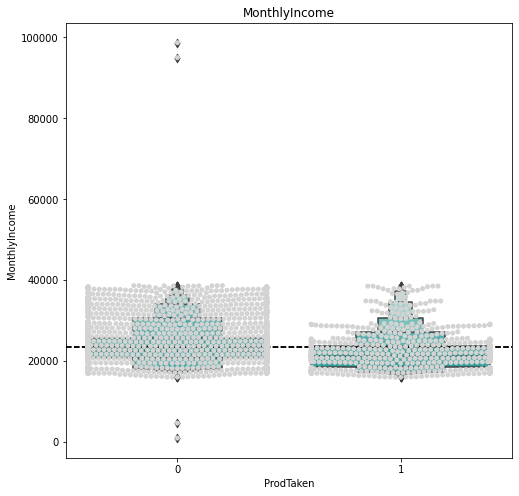

            count          mean          std  ...      50%       75%      max
ProdTaken                                     ...                            
0          3968.0  23879.207157  5355.323984  ...  22413.5  25760.25  98678.0
1           920.0  22178.885870  4567.349943  ...  21274.0  23857.50  38537.0

[2 rows x 8 columns] 


Mann-Whitney Test:
 MannwhitneyuResult(statistic=2222928.5, pvalue=6.248709013409074e-25)

____________________

Age 
____________________



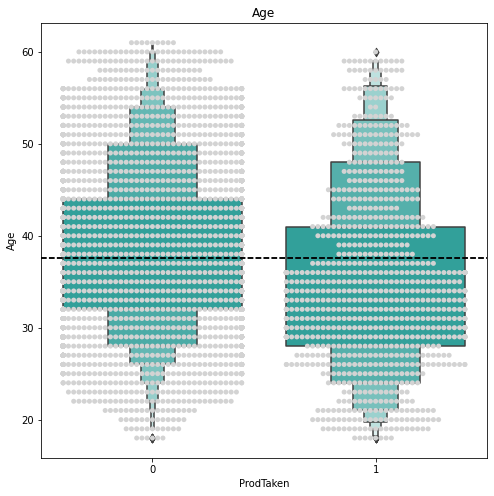

            count       mean       std   min   25%   50%   75%   max
ProdTaken                                                           
0          3968.0  38.177419  8.811116  18.0  32.0  36.0  44.0  61.0
1           920.0  34.829348  9.828021  18.0  28.0  33.0  41.0  60.0 


Mann-Whitney Test:
 MannwhitneyuResult(statistic=2238958.0, pvalue=6.91784881796281e-27)

____________________

NumberOfTrips 
____________________



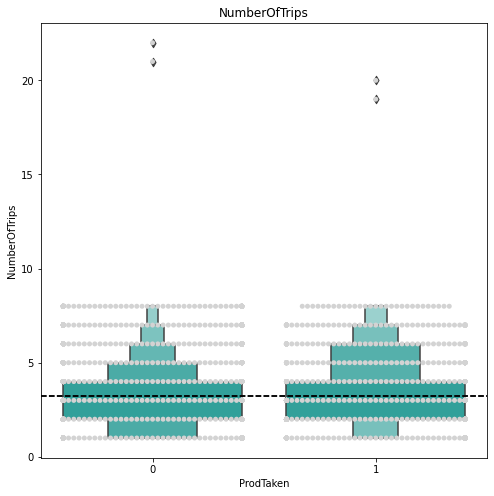

            count      mean       std  min  25%  50%  75%   max
ProdTaken                                                      
0          3968.0  3.212450  1.769551  1.0  2.0  3.0  4.0  22.0
1           920.0  3.304348  2.035801  1.0  2.0  3.0  4.0  20.0 


Mann-Whitney Test:
 MannwhitneyuResult(statistic=1832275.0, pvalue=0.8526467823999866)

____________________

DurationOfPitch 
____________________



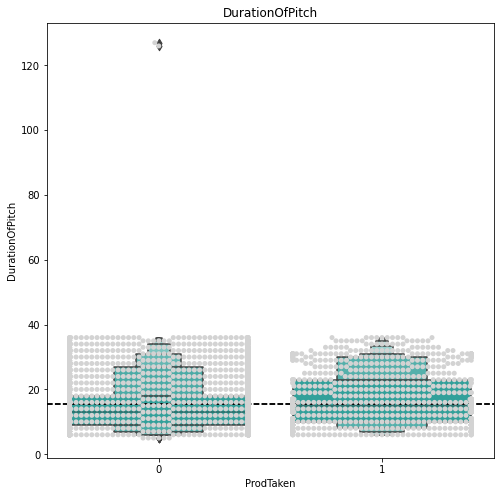

            count       mean       std  min   25%   50%   75%    max
ProdTaken                                                           
0          3968.0  15.056704  8.289783  5.0   9.0  13.0  18.0  127.0
1           920.0  16.683696  8.305049  6.0  10.0  15.0  23.0   36.0 


Mann-Whitney Test:
 MannwhitneyuResult(statistic=1598816.5, pvalue=4.03256515608977e-09)

____________________



In [25]:
# Bivariate Analysis 
wrangle.explore_bivariate(df, target, cat_var2, quant_var)

### Takeaway For bivariate Analysis and Statistical Tests

- On average, Executives are more likely to sign up for a travel travel package than any other designation group
- On average, those who have passports are more likely to sign up for a travel package than those who don't
- On average customers who are single are more likely to sign up for a package trip than married and divorced customers
-  On average, those who were invited by the company  are more likely to sign up for a travel package than those who were not

- for occupational group te graph shows than Freelancer has the highest propability to sing up for a travel package. However, there only 2 observations for freelancers. So in this case, we could say that large bussiness are on average more likely to sign up for a package travel than any other group.

- Those who own a car are slightly less likely to sign up for a travel package than those who do own a car
- Tier 3 choice increases the chances of taking a product than other tiers
- Pitch satistisfaction score of 3 and 5 increase the chances of signing up for a product than other scores
- On average, Males are more likely  to sign up for product than females
- 5 stars property incrreases the chances of signing up for a product than other property ratings.
- For the number of persons visiting, 3 has a slighly better chace of signing up than othe groups
- For the number of followups, 5 and 6 follow ups increase the chances of signing up for a product
- For the product pitched, most customers would sign up for basic than any othe product.
- Monthly income between 20 and 23 increses the odds of taking a product
- Customers below 40 years are more likely to sign up for a product than ustomer above 40
- Customers who have taken a product are more likely to sign up for more trips than customers who did not.
- On aveverage, customers who have taken a preoduct had the longest pitch duration than those who didn't



## Customer segmentation for Product Taken

In [26]:
import seaborn as sns

In [27]:
prod_taken = df[df.ProdTaken == 1]
prod_not_taken = df[df.ProdTaken == 0]

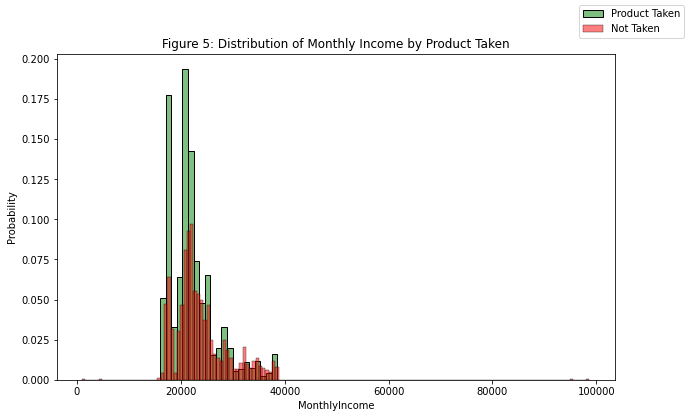

In [28]:
fig = plt.figure(figsize=(10,6))
plt.title('Figure 1: Distribution of Monthly Income by Product Taken')
sns.histplot(data=prod_taken['MonthlyIncome'], stat='probability', color = 'green', alpha=0.5, label='product Taken')
sns.histplot(data=prod_not_taken['MonthlyIncome'], stat='probability', color='red', alpha=0.5, label='product Taken')
fig.legend(labels=['Product Taken','Not Taken'])
plt.show;

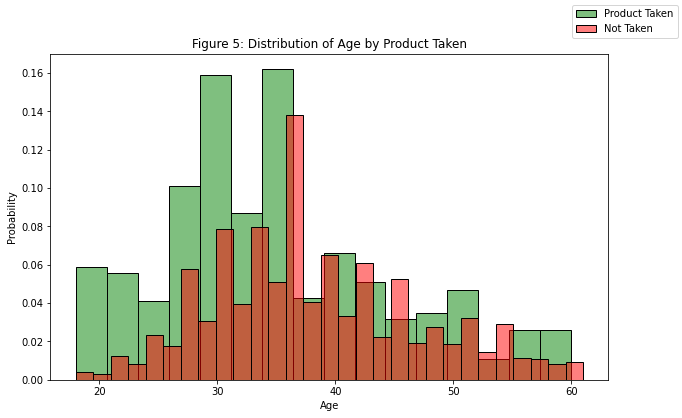

In [55]:
fig = plt.figure(figsize=(10,6))
plt.title('Figure 2: Distribution of Age by Product Taken')
sns.histplot(data=prod_taken['Age'], stat='probability', color = 'green', alpha=0.5, label='product Taken')
sns.histplot(data=prod_not_taken['Age'], stat='probability', color='red', alpha=0.5, label='product Taken')
fig.legend(labels=['Product Taken','Not Taken'])
plt.show;

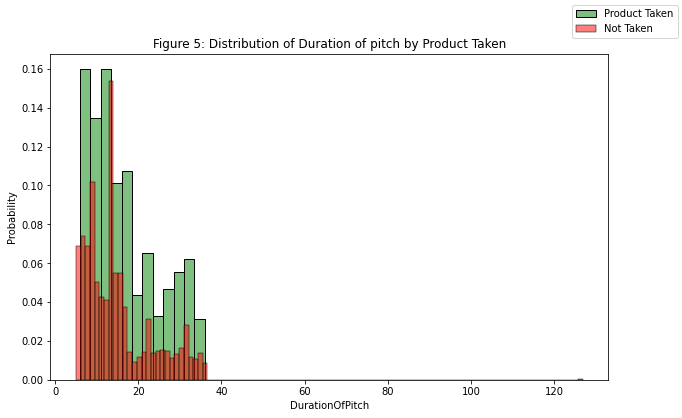

In [56]:
fig = plt.figure(figsize=(10,6))
plt.title('Figure 3: Distribution of Duration of pitch by Product Taken')
sns.histplot(data=prod_taken['DurationOfPitch'], stat='probability', color = 'green', alpha=0.5, label='product Taken')
sns.histplot(data=prod_not_taken['DurationOfPitch'], stat='probability', color='red', alpha=0.5, label='product Taken')
fig.legend(labels=['Product Taken','Not Taken'])
plt.show;

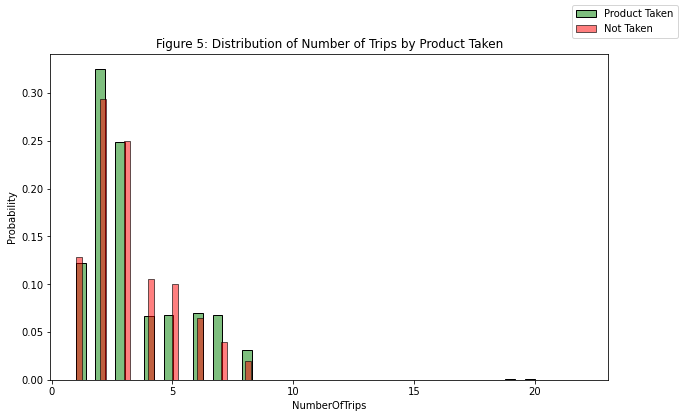

In [57]:
fig = plt.figure(figsize=(10,6))
plt.title('Figure 4: Distribution of Number of Trips by Product Taken')
sns.histplot(data=prod_taken['NumberOfTrips'], stat='probability', color = 'green', alpha=0.5, label='product Taken')
sns.histplot(data=prod_not_taken['NumberOfTrips'], stat='probability', color='red', alpha=0.5, label='product Taken')
fig.legend(labels=['Product Taken','Not Taken'])
plt.show;

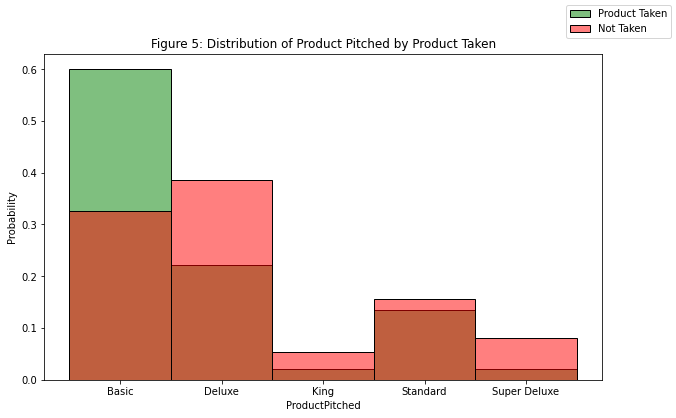

In [58]:
fig = plt.figure(figsize=(10,6))
plt.title('Figure 5: Distribution of Product Pitched by Product Taken')
sns.histplot(data=prod_taken['ProductPitched'], stat='probability', color = 'green', alpha=0.5, label='product Taken')
sns.histplot(data=prod_not_taken['ProductPitched'], stat='probability', color='red', alpha=0.5, label='product Taken')
fig.legend(labels=['Product Taken','Not Taken'])
plt.show;

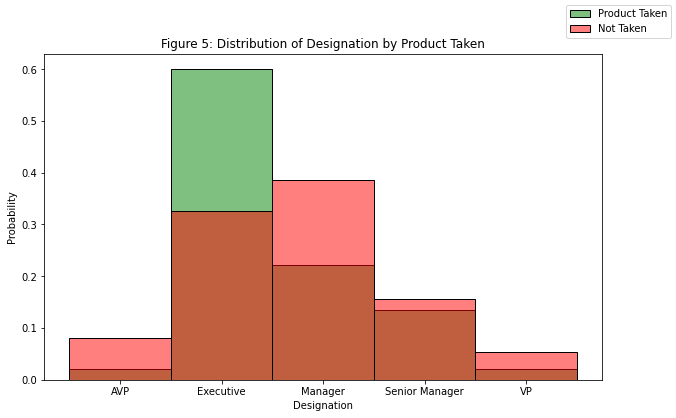

In [60]:
fig = plt.figure(figsize=(10,6))
plt.title('Figure 6: Distribution of Designation by Product Taken')
sns.histplot(data=prod_taken['Designation'], stat='probability', color = 'green', alpha=0.5, label='product Taken')
sns.histplot(data=prod_not_taken['Designation'], stat='probability', color='red', alpha=0.5, label='product Taken')
fig.legend(labels=['Product Taken','Not Taken'])
plt.show;

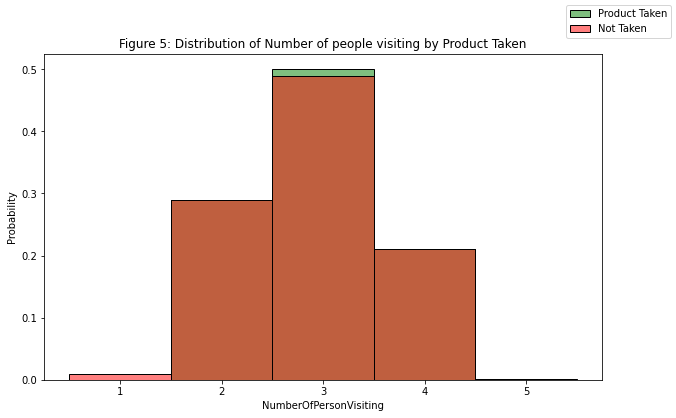

In [61]:
fig = plt.figure(figsize=(10,6))
plt.title('Figure 7: Distribution of Number of people visiting by Product Taken')
sns.histplot(data=prod_taken['NumberOfPersonVisiting'], stat='probability', color = 'green', alpha=0.5, label='product Taken')
sns.histplot(data=prod_not_taken['NumberOfPersonVisiting'], stat='probability', color='red', alpha=0.5, label='product Taken')
fig.legend(labels=['Product Taken','Not Taken'])
plt.show;

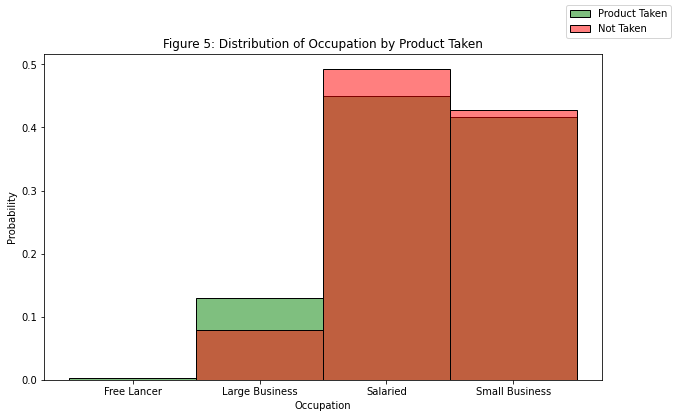

In [62]:
fig = plt.figure(figsize=(10,6))
plt.title('Figure 8: Distribution of Occupation by Product Taken')
sns.histplot(data=prod_taken['Occupation'], stat='probability', color = 'green', alpha=0.5, label='product Taken')
sns.histplot(data=prod_not_taken['Occupation'], stat='probability', color='red', alpha=0.5, label='product Taken')
fig.legend(labels=['Product Taken','Not Taken'])
plt.show;

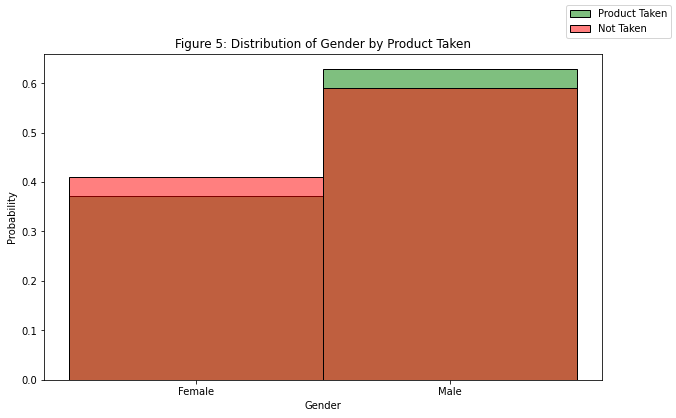

In [63]:
fig = plt.figure(figsize=(10,6))
plt.title('Figure 9: Distribution of Gender by Product Taken')
sns.histplot(data=prod_taken['Gender'], stat='probability', color = 'green', alpha=0.5, label='product Taken')
sns.histplot(data=prod_not_taken['Gender'], stat='probability', color='red', alpha=0.5, label='product Taken')
fig.legend(labels=['Product Taken','Not Taken'])
plt.show;

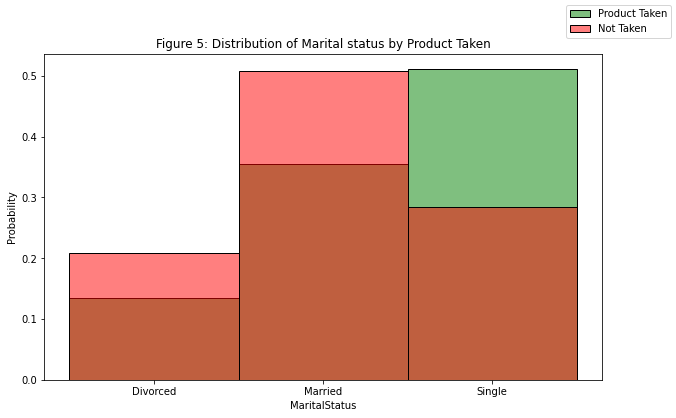

In [64]:
fig = plt.figure(figsize=(10,6))
plt.title('Figure 10: Distribution of Marital status by Product Taken')
sns.histplot(data=prod_taken['MaritalStatus'], stat='probability', color = 'green', alpha=0.5, label='product Taken')
sns.histplot(data=prod_not_taken['MaritalStatus'], stat='probability', color='red', alpha=0.5, label='product Taken')
fig.legend(labels=['Product Taken','Not Taken'])
plt.show;

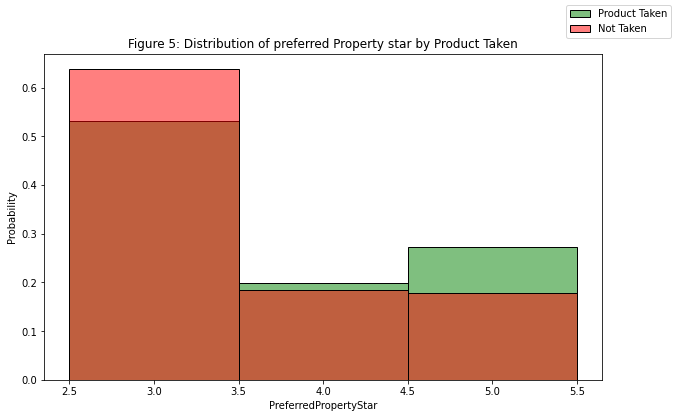

In [72]:
fig = plt.figure(figsize=(10,6))
plt.title('Figure 11: Distribution of preferred Property star by Product Taken')
sns.histplot(data=prod_taken['PreferredPropertyStar'], stat='probability', color = 'green', alpha=0.5, label='product Taken')
sns.histplot(data=prod_not_taken['PreferredPropertyStar'], stat='probability', color='red', alpha=0.5, label='product Taken')
fig.legend(labels=['Product Taken','Not Taken'])
plt.show;

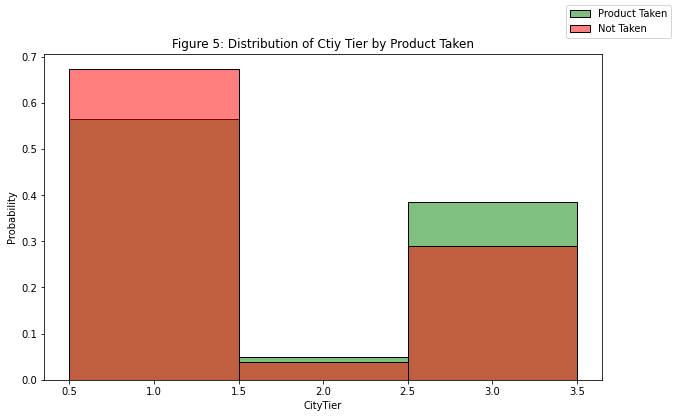

In [66]:
fig = plt.figure(figsize=(10,6))
plt.title('Figure 12: Distribution of Ctiy Tier by Product Taken')
sns.histplot(data=prod_taken['CityTier'], stat='probability', color = 'green', alpha=0.5, label='product Taken')
sns.histplot(data=prod_not_taken['CityTier'], stat='probability', color='red', alpha=0.5, label='product Taken')
fig.legend(labels=['Product Taken','Not Taken'])
plt.show;

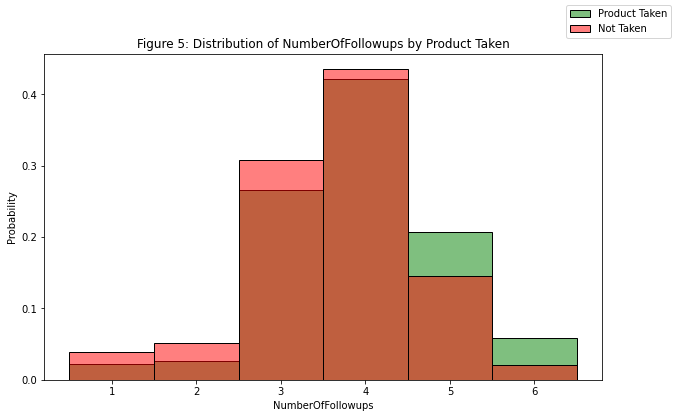

In [67]:
fig = plt.figure(figsize=(10,6))
plt.title('Figure 13: Distribution of NumberOfFollowups by Product Taken')
sns.histplot(data=prod_taken['NumberOfFollowups'], stat='probability', color = 'green', alpha=0.5, label='product Taken')
sns.histplot(data=prod_not_taken['NumberOfFollowups'], stat='probability', color='red', alpha=0.5, label='product Taken')
fig.legend(labels=['Product Taken','Not Taken'])
plt.show;

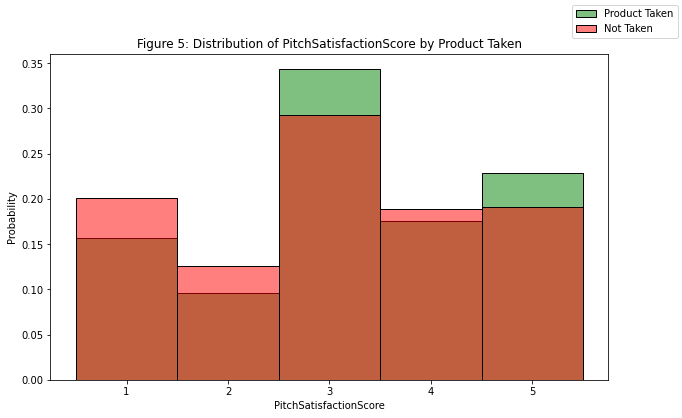

In [69]:
fig = plt.figure(figsize=(10,6))
plt.title('Figure 14: Distribution of PitchSatisfactionScore by Product Taken')
sns.histplot(data=prod_taken['PitchSatisfactionScore'], stat='probability', color = 'green', alpha=0.5, label='product Taken')
sns.histplot(data=prod_not_taken['PitchSatisfactionScore'], stat='probability', color='red', alpha=0.5, label='product Taken')
fig.legend(labels=['Product Taken','Not Taken'])
plt.show;

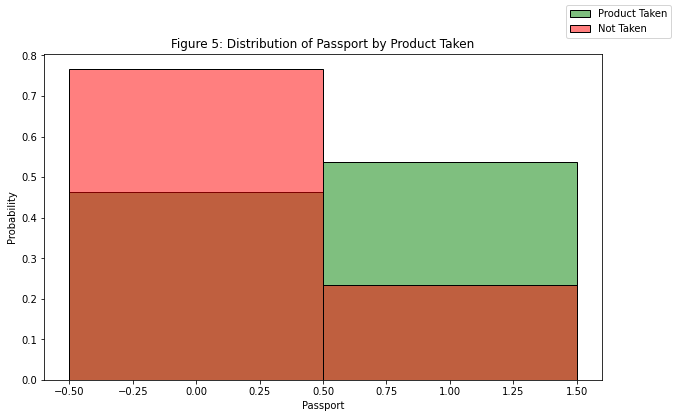

In [70]:
fig = plt.figure(figsize=(10,6))
plt.title('Figure 15: Distribution of Passport by Product Taken')
sns.histplot(data=prod_taken['Passport'], stat='probability', color = 'green', alpha=0.5, label='product Taken')
sns.histplot(data=prod_not_taken['Passport'], stat='probability', color='red', alpha=0.5, label='product Taken')
fig.legend(labels=['Product Taken','Not Taken'])
plt.show;

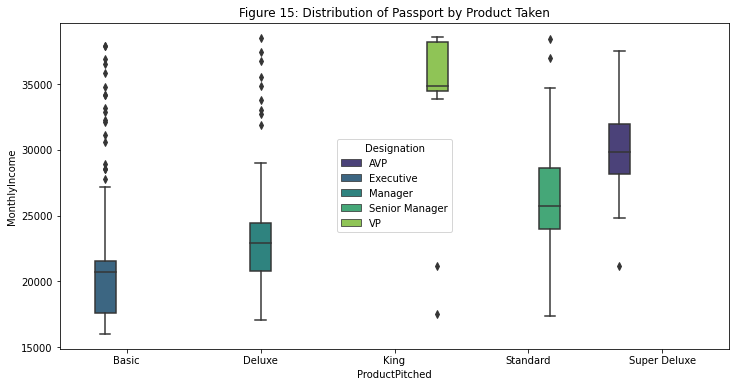

In [81]:
fig = plt.figure(figsize=(12,6))
plt.title('Figure 15: Distribution of Passport by Product Taken')
sns.boxplot(prod_taken['ProductPitched'], prod_taken['MonthlyIncome'], hue= prod_taken['Designation'],palette="viridis")
#sns.boxplot(prod_not_taken['ProductPitched'], prod_not_taken['MonthlyIncome'], hue= prod_not_taken['Designation'],palette="viridis")
#fig.legend(labels=['Product Taken','Not Taken'])
plt.show;

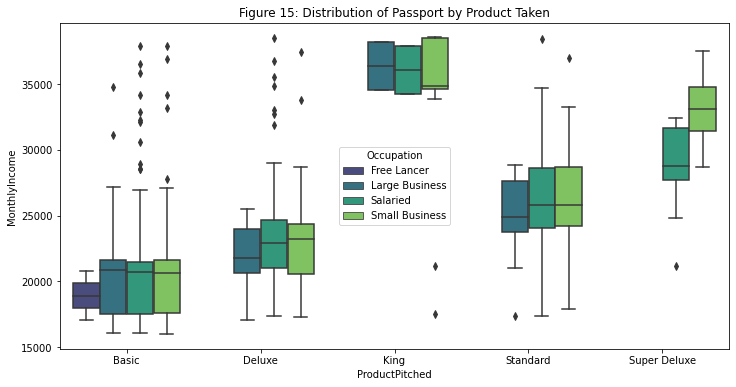

In [82]:
fig = plt.figure(figsize=(12,6))
plt.title('Figure 15: Distribution of Passport by Product Taken')
sns.boxplot(prod_taken['ProductPitched'], prod_taken['MonthlyIncome'], hue= prod_taken['Occupation'],palette="viridis")
plt.show;

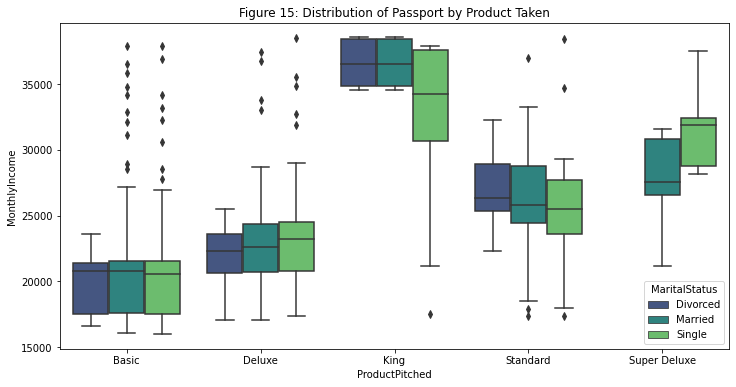

In [88]:
fig = plt.figure(figsize=(12,6))
plt.title('Figure 15: Distribution of Passport by Product Taken')
sns.boxplot(prod_taken['ProductPitched'], prod_taken['MonthlyIncome'], hue= prod_taken['MaritalStatus'],palette="viridis")
plt.show;

In [49]:
prod_taken[prod_taken["Designation"] == "Senior Manager"].describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
CustomerID,124.0,NaN,NaN,NaN,202621.693548,1453.911893,200050.0,201444.75,202467.5,203856.25,204885.0
ProdTaken,124.0,NaN,NaN,NaN,1.0,0.0,1.0,1.0,1.0,1.0,1.0
Age,124.0,NaN,NaN,NaN,40.967742,9.846741,19.0,33.0,38.0,49.0,60.0
TypeofContact,124,2,Self Enquiry,92,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CityTier,124.0,3.0,3.0,64.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DurationOfPitch,124.0,NaN,NaN,NaN,19.016129,9.028396,6.0,11.0,17.0,29.0,36.0
Occupation,124,3,Small Business,58,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,124,2,Male,76,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NumberOfPersonVisiting,124.0,3.0,3.0,62.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NumberOfFollowups,124.0,6.0,4.0,56.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
prod_taken[prod_taken["ProductPitched"]=="Standard"].describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
CustomerID,124.0,NaN,NaN,NaN,202621.693548,1453.911893,200050.0,201444.75,202467.5,203856.25,204885.0
ProdTaken,124.0,NaN,NaN,NaN,1.0,0.0,1.0,1.0,1.0,1.0,1.0
Age,124.0,NaN,NaN,NaN,40.967742,9.846741,19.0,33.0,38.0,49.0,60.0
TypeofContact,124,2,Self Enquiry,92,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CityTier,124.0,3.0,3.0,64.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DurationOfPitch,124.0,NaN,NaN,NaN,19.016129,9.028396,6.0,11.0,17.0,29.0,36.0
Occupation,124,3,Small Business,58,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,124,2,Male,76,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NumberOfPersonVisiting,124.0,3.0,3.0,62.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NumberOfFollowups,124.0,6.0,4.0,56.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
prod_taken[prod_taken["ProductPitched"]=="King"].describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
CustomerID,20.0,NaN,NaN,NaN,202529.9,1492.553407,200045.0,201364.5,202430.5,203507.5,204816.0
ProdTaken,20.0,NaN,NaN,NaN,1.0,0.0,1.0,1.0,1.0,1.0,1.0
Age,20.0,NaN,NaN,NaN,48.9,9.618513,27.0,42.0,52.5,56.0,59.0
TypeofContact,20,1,Self Enquiry,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CityTier,20.0,2.0,1.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DurationOfPitch,20.0,NaN,NaN,NaN,10.5,4.135851,8.0,8.0,9.0,9.0,19.0
Occupation,20,3,Small Business,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,20,2,Female,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NumberOfPersonVisiting,20.0,3.0,3.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NumberOfFollowups,20.0,4.0,3.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
prod_taken[prod_taken["ProductPitched"]=="Super Deluxe"].describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
CustomerID,20.0,NaN,NaN,NaN,202834.6,1452.761958,200706.0,201937.75,202785.5,203905.25,204865.0
ProdTaken,20.0,NaN,NaN,NaN,1.0,0.0,1.0,1.0,1.0,1.0,1.0
Age,20.0,NaN,NaN,NaN,43.5,4.83953,39.0,40.0,42.0,45.25,56.0
TypeofContact,20,2,Company Invited,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CityTier,20.0,2.0,3.0,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DurationOfPitch,20.0,NaN,NaN,NaN,18.5,7.330542,8.0,15.0,18.5,20.0,31.0
Occupation,20,2,Salaried,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,20,2,Male,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NumberOfPersonVisiting,20.0,3.0,3.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NumberOfFollowups,20.0,6.0,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
prod_taken[prod_taken["ProductPitched"]=="Basic"].describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
CustomerID,552.0,NaN,NaN,NaN,202605.467391,1445.951867,200002.0,201387.25,202444.5,203825.75,204887.0
ProdTaken,552.0,NaN,NaN,NaN,1.0,0.0,1.0,1.0,1.0,1.0,1.0
Age,552.0,NaN,NaN,NaN,31.605072,8.839967,18.0,26.0,30.0,36.0,59.0
TypeofContact,552,2,Self Enquiry,358,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CityTier,552.0,3.0,1.0,392.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DurationOfPitch,552.0,NaN,NaN,NaN,15.690217,7.779636,6.0,9.0,13.5,21.0,36.0
Occupation,552,4,Salaried,260,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,552,2,Male,344,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NumberOfPersonVisiting,552.0,3.0,3.0,276.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NumberOfFollowups,552.0,6.0,4.0,239.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
prod_taken[prod_taken["ProductPitched"]=="Deluxe"].describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
CustomerID,204.0,NaN,NaN,NaN,202596.872549,1454.182002,200000.0,201388.5,202441.5,203819.5,204883.0
ProdTaken,204.0,NaN,NaN,NaN,1.0,0.0,1.0,1.0,1.0,1.0,1.0
Age,204.0,NaN,NaN,NaN,37.593137,8.348101,21.0,32.0,36.0,43.25,59.0
TypeofContact,204,2,Self Enquiry,136,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CityTier,204.0,2.0,3.0,144.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DurationOfPitch,204.0,NaN,NaN,NaN,18.382353,8.885749,6.0,12.0,15.0,26.0,36.0
Occupation,204,3,Small Business,108,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,204,2,Male,134,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NumberOfPersonVisiting,204.0,3.0,3.0,102.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NumberOfFollowups,204.0,6.0,4.0,82.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Model And Evaluate
## Data Pre-processing
### Outliers detection

*   The data contains many outliers in  Income, Duration of pitch , and number of trips 
*   I will not be trearing outliers in this case because we are building a randon forest and decision tree based model.  Outliers has little to n effect on this models

### Binning and restructuring


1.   I will create bins for income and age and pace them in hierachical categories
2.   I will also assign numbers to categorical variables for smooth proccess
3.   I will also create dummy variables to fit into the different models




